In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Understanding

In [2]:
# read excel to dataframe
data = pd.read_excel('OnlineRetail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Data Preprocessing

In [6]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Add extra fields 
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
data['InvoiceYear'] = data['InvoiceDate'].dt.year
data['InvoiceMonth'] = data['InvoiceDate'].dt.month
data['InvoiceYearMonth'] = data['InvoiceYear'].map(str) + "-" + data['InvoiceMonth'].map(str)

In [8]:
data['Quantity'].value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [9]:
data[(data['Quantity']<0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50,2010,12,2010-12
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010,12,2010-12
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80,2010,12,2010-12
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,2010-12
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010,12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13,2011,12,2011-12
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69,2011,12,2011-12
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75,2011,12,2011-12
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25,2011,12,2011-12


In [10]:
len(data[(data['Quantity']<0)])

10624

In [11]:
# Only Quantity > 0 are displayed
data = data[data['Quantity'] > 0]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,2011-12


In [12]:
# Check if there is any duplicate data
data.loc[data.duplicated(),:]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,1.25,2010,12,2010-12
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,2.10,2010,12,2010-12
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom,2.95,2010,12,2010-12
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom,4.95,2010,12,2010-12
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom,2.95,2010,12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom,0.39,2011,12,2011-12
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom,2.49,2011,12,2011-12
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom,1.95,2011,12,2011-12
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom,2.10,2011,12,2011-12


In [13]:
data.drop_duplicates(inplace=True)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,2011-12


In [14]:
data[(data['UnitPrice']== 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,0.0,2010,12,2010-12
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,0.0,2010,12,2010-12
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0,2010,12,2010-12
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,0.0,2010,12,2010-12
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,0.0,2010,12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,2011-12-07 18:36:00,0.0,NaN,United Kingdom,0.0,2011,12,2011-12
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom,0.0,2011,12,2011-12
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0,2011,12,2011-12
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom,0.0,2011,12,2011-12


In [15]:
len(data[(data['UnitPrice']== 0)])

1174

In [16]:
data = data[data['UnitPrice'] > 0]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,2011-12


In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12


In [18]:
data.isnull().sum()

InvoiceNo                0
StockCode                0
Description              0
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          132186
Country                  0
TotalAmount              0
InvoiceYear              0
InvoiceMonth             0
InvoiceYearMonth         0
dtype: int64

In [19]:
data = data.dropna()

In [20]:
data = data.drop('StockCode', axis=1)

In [21]:
data.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2010-12
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2010-12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12


## Exploratory Data Analysis

In [22]:
# Total number of transactions
len(data['InvoiceNo'].unique())

18532

In [23]:
# Total profit
sum(data['TotalAmount'])

8887208.894003171

In [24]:
data['Description'].value_counts().unique().sum()

168889

In [25]:
gp_stockcode = data.groupby('Description')
gp_stockcode_frq_quantitiy = gp_stockcode['Quantity'].sum().sort_values(ascending=False)
# Top 20 Most Frequently sold items by quantitiy
gp_stockcode_frq_quantitiy.head(20)

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
PACK OF 12 LONDON TISSUES             25329
PACK OF 60 PINK PAISLEY CAKE CASES    24230
BROCADE RING PURSE                    22927
VICTORIAN GLASS HANGING T-LIGHT       22404
ASSORTED COLOURS SILK FAN             21876
RED  HARMONICA IN BOX                 20945
JUMBO BAG PINK POLKADOT               20148
SMALL POPCORN HOLDER                  18241
60 TEATIME FAIRY CAKE CASES           17664
LUNCH BAG RED RETROSPOT               17576
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Description'>

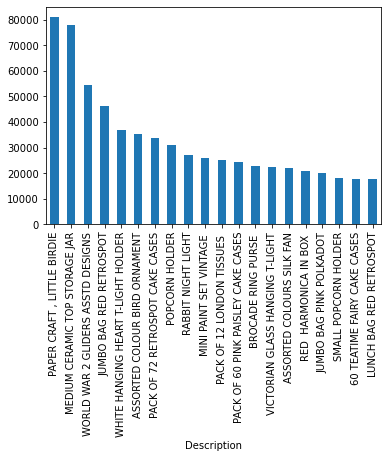

In [26]:
gp_stockcode_frq_quantitiy.head(20).plot.bar()
# Top 20 items most sold

In [27]:
gp_stockcode_frq_amount = gp_stockcode['TotalAmount'].sum().sort_values(ascending=False)
# Frequently sold items by total amount
gp_stockcode_frq_amount.head(20)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
CHILLI LIGHTS                          46265.11
PAPER CHAIN KIT 50'S CHRISTMAS         42584.13
PICNIC BASKET WICKER 60 PIECES         39619.50
BLACK RECORD COVER FRAME               39045.80
JUMBO BAG PINK POLKADOT                37254.36
DOORMAT KEEP CALM AND COME IN          35880.85
SPOTTY BUNTING                         35509.55
WOOD BLACK BOARD ANT WHITE FINISH      34414.71
SET OF 3 CAKE TINS PANTRY DESIGN       33298.30
JAM MAKING SET WITH JARS               32616.22
Name: TotalAmount, dtype: fl

<AxesSubplot:xlabel='Description'>

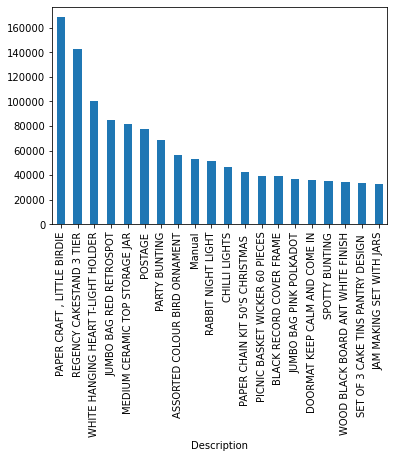

In [28]:
# visualize,Frequently sold items by total amount
gp_stockcode_frq_amount.head(20).plot.bar()

In [29]:
# Explore by month
gp_month = data.sort_values('InvoiceDate').groupby(['InvoiceYear', 'InvoiceMonth'])

In [30]:
# Month number of invoices
gp_month_invoices = gp_month['InvoiceNo'].unique().agg(np.size)
gp_month_invoices

InvoiceYear  InvoiceMonth
2010         12              1400
2011         1                987
             2                997
             3               1321
             4               1149
             5               1555
             6               1393
             7               1331
             8               1280
             9               1755
             10              1929
             11              2657
             12               778
Name: InvoiceNo, dtype: int64

<AxesSubplot:xlabel='InvoiceYear,InvoiceMonth'>

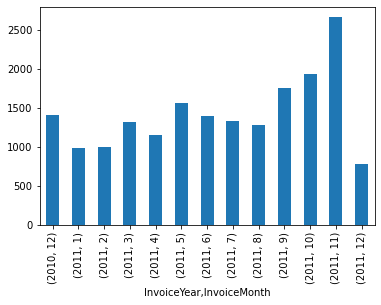

In [31]:
gp_month_invoices.plot.bar()

In [32]:
# Month total amounts
gp_month_frq_amount= gp_month['TotalAmount'].sum()
gp_month_frq_amount

InvoiceYear  InvoiceMonth
2010         12               570422.730
2011         1                568101.310
             2                446084.920
             3                594081.760
             4                468374.331
             5                677355.150
             6                660046.050
             7                598962.901
             8                644051.040
             9                950690.202
             10              1035642.450
             11              1156205.610
             12               517190.440
Name: TotalAmount, dtype: float64

<AxesSubplot:xlabel='InvoiceYear,InvoiceMonth'>

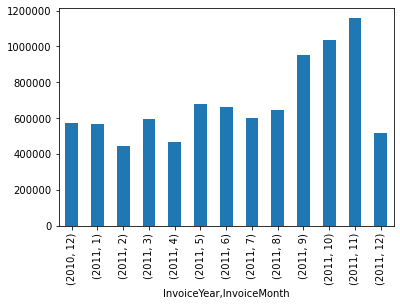

In [33]:
plt.ticklabel_format(style='plain') #to remove le6
gp_month_frq_amount.plot.bar()

In [61]:
####################### Explore By Countries ###############
gp_country = data.groupby('Country')
# Order countries by total amount
gp_country['TotalAmount'].sum().sort_values(ascending=False)

Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

In [62]:
# Order countries by number of invoices
gp_country['InvoiceNo'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          16646
Germany                   457
France                    389
EIRE                      260
Belgium                    98
Netherlands                94
Spain                      90
Australia                  57
Portugal                   57
Switzerland                51
Finland                    41
Italy                      38
Norway                     36
Sweden                     36
Channel Islands            26
Poland                     19
Japan                      19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Singapore                   7
Canada                      6
Malta                       5
Israel                      5
Greece                      5
USA                         5
Lithuania                   4
European Community          4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
Le

In [36]:
# Order countries by number of customers
gp_country['CustomerID'].unique().agg(np.size).sort_values(ascending=False)

Country
United Kingdom          3920
Germany                   94
France                    87
Spain                     30
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     14
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Greece                     4
EIRE                       3
Israel                     3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Czech Republic             1
Lithuania                  1
Lebanon                    1
RSA                        1
Saudi Arabia               1
Singapore                  1
Icelan

### By United Kingdom

In [37]:
# Explore more info about United Kingdom invoices because it has the max total amount
# Get United Kingdom top ranked customers based on the total amount
uk_customers_amounts = data[data['Country']=='United Kingdom'].groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False)
uk_customers_amounts.head(20)

CustomerID
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
16684.0     66653.56
14096.0     65164.79
13694.0     65039.62
15311.0     60632.75
13089.0     58762.08
17949.0     58510.48
15769.0     56252.72
15061.0     54534.14
14298.0     51527.30
14088.0     50491.81
15749.0     44534.30
12931.0     42055.96
17841.0     40519.84
15098.0     39916.50
Name: TotalAmount, dtype: float64

<AxesSubplot:xlabel='CustomerID'>

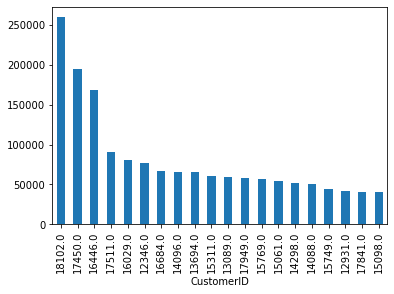

In [38]:
uk_customers_amounts.head(20).plot.bar()

In [39]:
# United Kingdom frequently sold items by quantitiy
uk_gp_stockcode = data[data['Country']=='United Kingdom'].groupby('Description')
uk_gp_stockcode_frq_quantitiy = uk_gp_stockcode['Quantity'].sum().sort_values(ascending=False)
uk_gp_stockcode_frq_quantitiy.head(20) # Top 20 most sold items 

Description
PAPER CRAFT , LITTLE BIRDIE            80995
MEDIUM CERAMIC TOP STORAGE JAR         76919
WORLD WAR 2 GLIDERS ASSTD DESIGNS      49086
JUMBO BAG RED RETROSPOT                41878
WHITE HANGING HEART T-LIGHT HOLDER     34630
ASSORTED COLOUR BIRD ORNAMENT          32628
POPCORN HOLDER                         28923
PACK OF 12 LONDON TISSUES              24321
BROCADE RING PURSE                     22675
PACK OF 72 RETROSPOT CAKE CASES        22442
VICTORIAN GLASS HANGING T-LIGHT        21876
PACK OF 60 PINK PAISLEY CAKE CASES     19959
ASSORTED COLOURS SILK FAN              19116
JUMBO BAG PINK POLKADOT                18075
RED  HARMONICA IN BOX                  16895
SMALL POPCORN HOLDER                   16686
HEART OF WICKER SMALL                  16354
JUMBO BAG STRAWBERRY                   15765
PAPER CHAIN KIT 50'S CHRISTMAS         14772
COLOUR GLASS T-LIGHT HOLDER HANGING    14739
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Description'>

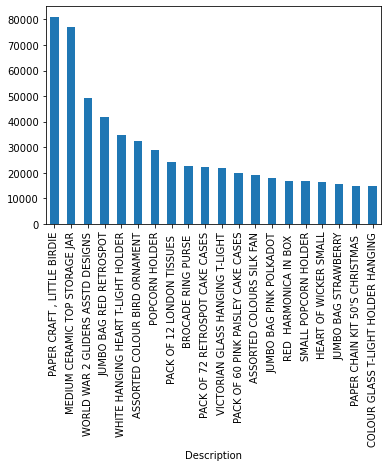

In [40]:
uk_gp_stockcode_frq_quantitiy.head(20).plot.bar()

In [41]:
# Frequently sold items by total amount
uk_gp_stockcode_frq_amount = uk_gp_stockcode['TotalAmount'].sum().sort_values(ascending=False) #desending order
uk_gp_stockcode_frq_amount.head(20)

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              110713.00
WHITE HANGING HEART T-LIGHT HOLDER     94805.50
MEDIUM CERAMIC TOP STORAGE JAR         80291.44
JUMBO BAG RED RETROSPOT                77191.33
PARTY BUNTING                          63050.28
ASSORTED COLOUR BIRD ORNAMENT          52228.68
CHILLI LIGHTS                          45483.91
PAPER CHAIN KIT 50'S CHRISTMAS         40392.08
PICNIC BASKET WICKER 60 PIECES         39619.50
BLACK RECORD COVER FRAME               37835.84
DOORMAT KEEP CALM AND COME IN          34852.30
WOOD BLACK BOARD ANT WHITE FINISH      33508.46
JUMBO BAG PINK POLKADOT                33389.52
SPOTTY BUNTING                         30129.55
JUMBO BAG STRAWBERRY                   28749.10
HEART OF WICKER LARGE                  28287.90
VICTORIAN GLASS HANGING T-LIGHT        27973.96
HEART OF WICKER SMALL                  27549.99
SET OF 3 CAKE TINS PANTRY DESIGN       25206.85
Name: TotalAmount, dtype: fl

<AxesSubplot:xlabel='Description'>

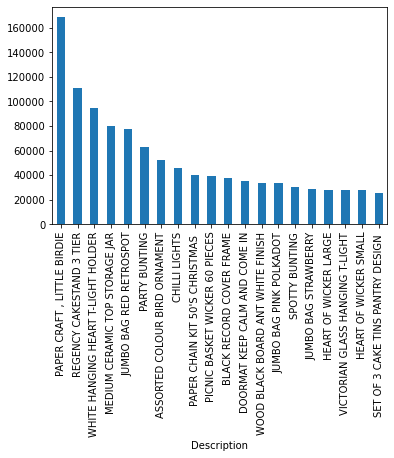

In [42]:
uk_gp_stockcode_frq_amount.head(20).plot.bar()

In [43]:
# Explore United Kingdom by month
uk_gp_month = data[data['Country']=='United Kingdom'].groupby(['InvoiceYear', 'InvoiceMonth'])
# United Kingdom By Month number of invoices
uk_gp_month_invoices = uk_gp_month['InvoiceNo'].unique().agg(np.size)
uk_gp_month_invoices

InvoiceYear  InvoiceMonth
2010         12              1291
2011         1                874
             2                896
             3               1177
             4               1058
             5               1403
             6               1249
             7               1200
             8               1133
             9               1568
             10              1705
             11              2386
             12               706
Name: InvoiceNo, dtype: int64

<AxesSubplot:xlabel='InvoiceYear,InvoiceMonth'>

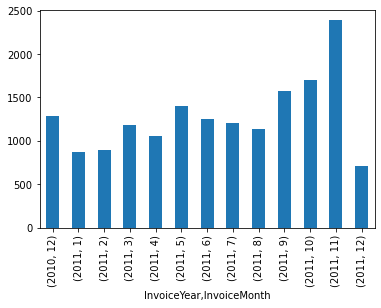

In [44]:
uk_gp_month_invoices.plot.bar()

In [45]:
# United Kingdom By Month total amounts
uk_gp_month_frq_amount= uk_gp_month['TotalAmount'].sum()
uk_gp_month_frq_amount

InvoiceYear  InvoiceMonth
2010         12              496477.340
2011         1               440876.330
             2               354618.200
             3               465784.190
             4               408733.111
             5               550359.350
             6               523775.590
             7               484545.591
             8               497194.910
             9               794806.692
             10              821220.130
             11              975251.390
             12              471381.820
Name: TotalAmount, dtype: float64

<AxesSubplot:xlabel='InvoiceYear,InvoiceMonth'>

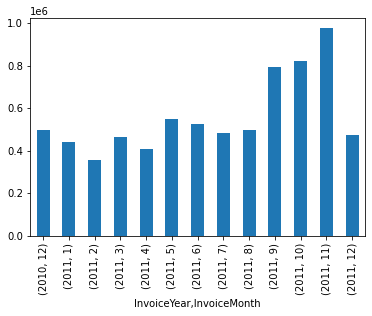

In [46]:
uk_gp_month_frq_amount.plot.bar()

Let look at any 3 of top 5 country - UK, Netherlands, EIRB, Germany,France
# Association Rules - Apriori

## United Kingdom Rules


In [47]:
# Set transactions
uk_gp_invoiceno = data[data['Country']=='United Kingdom'].groupby('InvoiceNo')
uk_transactions = []
for name,group in uk_gp_invoiceno:
    uk_transactions.append(list(group['Description'].map(str)))
uk_gp_invoiceno.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2010-12
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2010-12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541873,581585,ZINC WILLIE WINKIE CANDLE STICK,24,2011-12-09 12:31:00,0.85,15804.0,United Kingdom,20.40,2011,12,2011-12
541890,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011,12,2011-12
541891,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011,12,2011-12
541892,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011,12,2011-12


In [48]:
# Training Apriori on the dataset
# Needs to import https://pypi.python.org/pypi/apyori/1.0.0
#min_support: The minimum support for the relations: 0.01-0.05
#min_confidence= the minimum confidence for the relations: 0.5-1
# min_lift = The minimum lift for the relations: 2-5
# min_length = The min num of items that shoud be there in the rule: Atleast should be 2
# max_length = The max num of items that should be there in the rule: The max you get the better
from apyori import apriori
uk_rules = apriori(uk_transactions, min_support = 0.02, min_confidence = 0.8, min_lift = 2, min_length = 2)
# Get the results
uk_results = list(uk_rules)

In [49]:
# Visualising the result as a readeable dataframe
pd.set_option('display.max_columns', None)
uk_final_results = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(uk_results), 6)), columns=['GeneralRules', 'LeftRules', 'RightRules', 'Support', 'Confidence', 'Lift'])
index = 0

for g, s, i in uk_results:
    uk_final_results.iloc[index] = [' , '.join(list(g)), ' , '.join(list(i[0][0])), ' , '.join(list(i[0][1])), s, i[0][2], i[0][3]]
    index = index+1
    
# The most significant rules
uk_final_results = uk_final_results.sort_values(by='Confidence', ascending=0)
uk_final_results.head(10)

,GeneralRules,LeftRules,RightRules,Support,Confidence,Lift
1,"ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...","GREEN REGENCY TEACUP AND SAUCER , PINK REGENCY...",ROSES REGENCY TEACUP AND SAUCER,0.020485,0.844059,20.723028
0,"GREEN REGENCY TEACUP AND SAUCER , PINK REGENCY...",PINK REGENCY TEACUP AND SAUCER,GREEN REGENCY TEACUP AND SAUCER,0.024270,0.819473,22.289120


In [50]:
count=1

for i, d in uk_final_results.head(10).iterrows():
    print('Rule #'+str(count)+':')
    print(d['LeftRules'])
    print('=> '+d['RightRules'])
    print('Support: '+str(round(d['Support'],4))+' - Confidence: '+str(round(d['Confidence'],4))
          +' - Lift: '+str(round(d['Lift'],4)))
    print('--------------------')
    count=count+1


Rule #1:
GREEN REGENCY TEACUP AND SAUCER , PINK REGENCY TEACUP AND SAUCER
=> ROSES REGENCY TEACUP AND SAUCER 
Support: 0.0205 - Confidence: 0.8441 - Lift: 20.723
--------------------
Rule #2:
PINK REGENCY TEACUP AND SAUCER
=> GREEN REGENCY TEACUP AND SAUCER
Support: 0.0243 - Confidence: 0.8195 - Lift: 22.2891
--------------------


## France Rules

In [51]:
# Set transactions
france_gp_invoiceno = data[data['Country']=='France'].groupby('InvoiceNo')
france_transactions = []
for name,group in france_gp_invoiceno:
    france_transactions.append(list(group['Description'].map(str)))
france_gp_invoiceno.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
26,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010,12,2010-12
27,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0,2010,12,2010-12
28,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.0,2010,12,2010-12
29,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.2,2010,12,2010-12
30,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.6,2010,12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
541894,581587,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France,23.4,2011,12,2011-12
541895,581587,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.8,2011,12,2011-12
541896,581587,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.8,2011,12,2011-12
541897,581587,ALARM CLOCK BAKELIKE PINK,4,2011-12-09 12:50:00,3.75,12680.0,France,15.0,2011,12,2011-12


In [52]:
from apyori import apriori
france_rules = apriori(france_transactions, min_support = 0.02, min_confidence = 0.8, min_lift = 2, min_length = 2)
# Get the results
france_results = list(france_rules)

In [53]:
# Visualising the result as a readeable dataframe
france_final_results = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(france_results), 6)), columns=['GeneralRules', 'LeftRules', 'RightRules', 'Support', 'Confidence', 'Lift'])
index = 0

for g, s, i in france_results:
    france_final_results.iloc[index] = [' , '.join(list(g)), ' , '.join(list(i[0][0])), ' , '.join(list(i[0][1])), s, i[0][2], i[0][3]]
    index = index+1
    
# The most significant rules
france_final_results = france_final_results.sort_values(by='Confidence', ascending=0)
france_final_results.head(10)

,GeneralRules,LeftRules,RightRules,Support,Confidence,Lift
0,"DOLLY GIRL BABY GIFT SET , SPACEBOY BABY GIFT...",DOLLY GIRL BABY GIFT SET,SPACEBOY BABY GIFT SET,0.023136,1.0,24.312500
265,"PLASTERS IN TIN CIRCUS PARADE , SET/6 RED SPO...","PLASTERS IN TIN CIRCUS PARADE , SET/6 RED SPO...",SET/6 RED SPOTTY PAPER CUPS,0.023136,1.0,7.203704
207,"RED TOADSTOOL LED NIGHT LIGHT , MINI LIGHTS WO...","RED TOADSTOOL LED NIGHT LIGHT , MINI LIGHTS WO...",RABBIT NIGHT LIGHT,0.020566,1.0,5.328767
208,"SET/20 RED RETROSPOT PAPER NAPKINS , MINI PAI...","SET/20 RED RETROSPOT PAPER NAPKINS , MINI PAI...",SET/6 RED SPOTTY PAPER CUPS,0.035990,1.0,7.203704
209,"SET/20 RED RETROSPOT PAPER NAPKINS , MINI PAI...","SET/20 RED RETROSPOT PAPER NAPKINS , MINI PAI...",SET/6 RED SPOTTY PAPER PLATES,0.035990,1.0,7.780000
211,"PACK OF 20 NAPKINS RED APPLES , SET/6 RED SPOT...","PACK OF 20 NAPKINS RED APPLES , SET/6 RED SPOT...",SET/6 RED SPOTTY PAPER PLATES,0.020566,1.0,7.780000
220,"PACK OF 20 SKULL PAPER NAPKINS , PACK OF 6 SKU...","PACK OF 20 SKULL PAPER NAPKINS , SET OF 9 BLAC...",PACK OF 6 SKULL PAPER PLATES,0.025707,1.0,17.681818
225,"SET OF 9 HEART SHAPED BALLOONS , PACK OF 20 SK...","SET OF 9 HEART SHAPED BALLOONS , SET/20 RED RE...",PACK OF 20 SKULL PAPER NAPKINS,0.020566,1.0,20.473684
230,"PACK OF 6 SKULL PAPER PLATES , PACK OF 6 SKULL...","PACK OF 6 SKULL PAPER CUPS , SET OF 9 BLACK SK...",PACK OF 6 SKULL PAPER PLATES,0.028278,1.0,17.681818
235,"SET/20 RED RETROSPOT PAPER NAPKINS , PACK OF ...","SET/20 RED RETROSPOT PAPER NAPKINS , SET OF 9...",PACK OF 6 SKULL PAPER CUPS,0.020566,1.0,15.560000


In [54]:
count=1

for i, d in france_final_results.head(10).iterrows():
    print('Rule #'+str(count)+':')
    print(d['LeftRules'])
    print('=> '+d['RightRules'])
    print('Support: '+str(round(d['Support'],4))+' - Confidence: '+str(round(d['Confidence'],4))
          +' - Lift: '+str(round(d['Lift'],4)))
    print('--------------------')
    count=count+1

Rule #1:
DOLLY GIRL BABY GIFT SET
=>  SPACEBOY BABY GIFT SET
Support: 0.0231 - Confidence: 1.0 - Lift: 24.3125
--------------------
Rule #2:
PLASTERS IN TIN CIRCUS PARADE  , SET/6 RED SPOTTY PAPER PLATES
=> SET/6 RED SPOTTY PAPER CUPS
Support: 0.0231 - Confidence: 1.0 - Lift: 7.2037
--------------------
Rule #3:
RED TOADSTOOL LED NIGHT LIGHT , MINI LIGHTS WOODLAND MUSHROOMS
=> RABBIT NIGHT LIGHT
Support: 0.0206 - Confidence: 1.0 - Lift: 5.3288
--------------------
Rule #4:
SET/20 RED RETROSPOT PAPER NAPKINS  , MINI PAINT SET VINTAGE 
=> SET/6 RED SPOTTY PAPER CUPS
Support: 0.036 - Confidence: 1.0 - Lift: 7.2037
--------------------
Rule #5:
SET/20 RED RETROSPOT PAPER NAPKINS  , MINI PAINT SET VINTAGE 
=> SET/6 RED SPOTTY PAPER PLATES
Support: 0.036 - Confidence: 1.0 - Lift: 7.78
--------------------
Rule #6:
PACK OF 20 NAPKINS RED APPLES , SET/6 RED SPOTTY PAPER CUPS
=> SET/6 RED SPOTTY PAPER PLATES
Support: 0.0206 - Confidence: 1.0 - Lift: 7.78
--------------------
Rule #7:
PACK OF 20

## EIRE Rules

In [55]:
# Set transactions
eire_gp_invoiceno = data[data['Country']=='EIRE'].groupby('InvoiceNo')
eire_transactions = []
for name,group in eire_gp_invoiceno:
    eire_transactions.append(list(group['Description'].map(str)))
eire_gp_invoiceno.head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,InvoiceYear,InvoiceMonth,InvoiceYearMonth
1404,536540,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE,39.80,2010,12,2010-12
1405,536540,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,17.70,2010,12,2010-12
1406,536540,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,15.30,2010,12,2010-12
1407,536540,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE,42.50,2010,12,2010-12
1408,536540,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE,13.50,2010,12,2010-12
...,...,...,...,...,...,...,...,...,...,...,...
539084,581433,CHRISTMAS LIGHTS 10 SANTAS,12,2011-12-08 15:54:00,2.95,14911.0,EIRE,35.40,2011,12,2011-12
539085,581433,LANTERN CREAM GAZEBO,3,2011-12-08 15:54:00,4.95,14911.0,EIRE,14.85,2011,12,2011-12
539086,581433,HANGING METAL STAR LANTERN,12,2011-12-08 15:54:00,0.79,14911.0,EIRE,9.48,2011,12,2011-12
539087,581433,HANGING METAL HEART LANTERN,12,2011-12-08 15:54:00,0.79,14911.0,EIRE,9.48,2011,12,2011-12


In [56]:
from apyori import apriori
eire_rules = apriori(eire_transactions, min_support = 0.02, min_confidence = 0.8, min_lift = 2, min_length = 2)
# Get the results
eire_results = list(eire_rules)

In [57]:
# Visualising the result as a readeable dataframe
eire_final_results = pd.DataFrame(np.random.randint(low=0, high=1, size=(len(eire_results), 6)), columns=['GeneralRules', 'LeftRules', 'RightRules', 'Support', 'Confidence', 'Lift'])
index = 0
for g, s, i in eire_results:
    eire_final_results.iloc[index] = [' , '.join(list(g)), ' , '.join(list(i[0][0])), ' , '.join(list(i[0][1])), s, i[0][2], i[0][3]]
    index = index+1
# The most significant rules
eire_final_results = eire_final_results.sort_values(by='Confidence', ascending=0)
eire_final_results.head(10)

,GeneralRules,LeftRules,RightRules,Support,Confidence,Lift
688,"REGENCY TEA PLATE GREEN , SET OF 3 REGENCY CA...","REGENCY TEA PLATE GREEN , SET OF 3 REGENCY CA...","ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.023077,1.0,9.629630
448,"REGENCY TEA PLATE GREEN , REGENCY MILK JUG PI...","REGENCY TEA PLATE GREEN , REGENCY MILK JUG PI...",ROSES REGENCY TEACUP AND SAUCER,0.034615,1.0,5.909091
467,"REGENCY SUGAR TONGS , ROSES REGENCY TEACUP AND...","REGENCY SUGAR TONGS , PINK REGENCY TEACUP AND ...","REGENCY TEAPOT ROSES , ROSES REGENCY TEACUP A...",0.023077,1.0,16.250000
466,"SET OF 3 REGENCY CAKE TINS , REGENCY SUGAR BOW...","SET OF 3 REGENCY CAKE TINS , REGENCY SUGAR BOW...",ROSES REGENCY TEACUP AND SAUCER,0.026923,1.0,5.909091
464,"REGENCY SUGAR BOWL GREEN , ROSES REGENCY TEACU...","REGENCY SUGAR BOWL GREEN , PINK REGENCY TEACUP...",ROSES REGENCY TEACUP AND SAUCER,0.042308,1.0,5.909091
463,"REGENCY TEAPOT ROSES , REGENCY SUGAR BOWL GRE...","REGENCY TEAPOT ROSES , REGENCY TEA PLATE ROSE...",REGENCY SUGAR BOWL GREEN,0.030769,1.0,10.833333
1162,"REGENCY TEA PLATE GREEN , REGENCY TEA PLATE P...","REGENCY CAKESTAND 3 TIER , PINK REGENCY TEACUP...","REGENCY TEA PLATE GREEN , ROSES REGENCY TEACU...",0.023077,1.0,18.571429
1164,"REGENCY TEA PLATE GREEN , REGENCY TEA PLATE R...","REGENCY CAKESTAND 3 TIER , PINK REGENCY TEACUP...","REGENCY TEA PLATE GREEN , REGENCY TEA PLATE R...",0.023077,1.0,17.333333
459,"REGENCY TEA PLATE GREEN , REGENCY SUGAR BOWL ...","REGENCY TEA PLATE GREEN , REGENCY SUGAR BOWL ...",ROSES REGENCY TEACUP AND SAUCER,0.042308,1.0,5.909091
1166,"REGENCY TEA PLATE PINK , REGENCY TEA PLATE ROS...","REGENCY CAKESTAND 3 TIER , PINK REGENCY TEACUP...","REGENCY TEA PLATE ROSES , REGENCY TEA PLATE P...",0.023077,1.0,18.571429


In [58]:
count=1

for i, d in eire_final_results.head(10).iterrows():
    print('Rule #'+str(count)+':')
    print(d['LeftRules'])
    print('=> '+d['RightRules'])
    print('Support: '+str(round(d['Support'],4))+' - Confidence: '+str(round(d['Confidence'],4))
          +' - Lift: '+str(round(d['Lift'],4)))
    print('--------------------')
    count=count+1

Rule #1:
REGENCY TEA PLATE GREEN  , SET OF 3 REGENCY CAKE TINS , GREEN REGENCY TEACUP AND SAUCER
=> ROSES REGENCY TEACUP AND SAUCER  , PINK REGENCY TEACUP AND SAUCER
Support: 0.0231 - Confidence: 1.0 - Lift: 9.6296
--------------------
Rule #2:
REGENCY TEA PLATE GREEN  , REGENCY MILK JUG PINK  , PINK REGENCY TEACUP AND SAUCER
=> ROSES REGENCY TEACUP AND SAUCER 
Support: 0.0346 - Confidence: 1.0 - Lift: 5.9091
--------------------
Rule #3:
REGENCY SUGAR TONGS , PINK REGENCY TEACUP AND SAUCER
=> REGENCY TEAPOT ROSES  , ROSES REGENCY TEACUP AND SAUCER 
Support: 0.0231 - Confidence: 1.0 - Lift: 16.25
--------------------
Rule #4:
SET OF 3 REGENCY CAKE TINS , REGENCY SUGAR BOWL GREEN , PINK REGENCY TEACUP AND SAUCER
=> ROSES REGENCY TEACUP AND SAUCER 
Support: 0.0269 - Confidence: 1.0 - Lift: 5.9091
--------------------
Rule #5:
REGENCY SUGAR BOWL GREEN , PINK REGENCY TEACUP AND SAUCER , REGENCY TEA PLATE ROSES 
=> ROSES REGENCY TEACUP AND SAUCER 
Support: 0.0423 - Confidence: 1.0 - Lift: 5